In [ ]:
# 
  - Based on Roth data to create charts  
  - Read data created by Sandeep
    - create a pivot table
      - column:  Decision_Flow
      - row: Period
      - value: Count +   Any_score_Count 

In [10]:
import pandas as pd
from pandas import ExcelWriter
import matplotlib.pyplot as plt

In [3]:

path = 'C:\\Users\\sophia.yue\\Infosys\\Sandeep Project\\'
df = pd.read_excel(path + "Roth_data_score_count_chart_sredits_sep14.xlsx", sheet_name = 'DATA', engine = 'openpyxl' )
df.head()

,Revw_Quarter+A1:O5,Score,Count,Any_score_Count,FinanciCountal_template_Count,Any_Score_Pct,Fin_Temp_Pct,Year,Quarter,Period,QuarterNumber,Decision_Flow,Pct_AnyScore,Pct_WithTemplate
0,2019/1,Y,61,57,10,0.934,0.164,2019,1,2019Q1,1,Auto,93.442623,16.393443
1,2019/1,N,153,120,126,0.784,0.824,2019,1,2019Q1,1,Manual,78.431373,82.352941
2,2019/2,Y,64,62,7,0.969,0.109,2019,2,2019Q2,2,Auto,96.875000,10.937500
3,2019/2,N,142,114,119,0.803,0.838,2019,2,2019Q2,2,Manual,80.281690,83.802817
4,2019/3,Y,52,49,5,0.942,0.096,2019,3,2019Q3,3,Auto,94.230769,9.615385


In [4]:
df.dtypes

Revw_Quarter+A1:O5                object
Score                             object
Count                              int64
Any_score_Count                    int64
FinanciCountal_template_Count      int64
Any_Score_Pct                    float64
Fin_Temp_Pct                     float64
Year                               int64
Quarter                            int64
Period                            object
QuarterNumber                      int64
Decision_Flow                     object
Pct_AnyScore                     float64
Pct_WithTemplate                 float64
dtype: object

##  create a pivot table
 - column:  Decision_Flow
 - row/index: Period
 - value: Count +   Any_score_Count 

In [8]:
dfp = df.pivot(columns = 'Decision_Flow', index= 'Period', values = ['Count', 'Any_score_Count']) # df
dfp               

Count        Any_score_Count       
Decision_Flow  Auto Manual            Auto Manual
Period                                           
2019Q1           61    153              57    120
2019Q2           64    142              62    114
2019Q3           52    141              49    116
2019Q4           50    117              49     90
2020Q1           39    120              38     95
2020Q2           45     93              44     73
2020Q3           45    113              43     93
2020Q4           42    122              37     97
2021Q1           53    110              53     81
2021Q2           69    158              65    118
2021Q3           58    150              56    115
2021Q4           55    160              52    121
2022Q1           62    137              59    110
2022Q2          157    185             148    157

In [9]:
dfp.dtypes

                 Decision_Flow
Count            Auto             int64
                 Manual           int64
Any_score_Count  Auto             int64
                 Manual           int64
dtype: object

In [12]:
df.pivot_table('Count', index='Period', columns='Decision_Flow', aggfunc='sum')

Decision_Flow,Auto,Manual
Period,,
2019Q1,61,153
2019Q2,64,142
2019Q3,52,141
2019Q4,50,117
2020Q1,39,120
2020Q2,45,93
2020Q3,45,113
2020Q4,42,122
2021Q1,53,110


Text(0, 0.5, 'Total count per quarter')

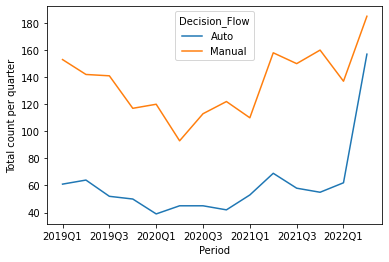

In [13]:
df.pivot_table('Count', index='Period', columns='Decision_Flow', aggfunc='sum').plot()
plt.ylabel('Total count per quarter')

Text(0, 0.5, 'Total Any_score_Count per quarter')

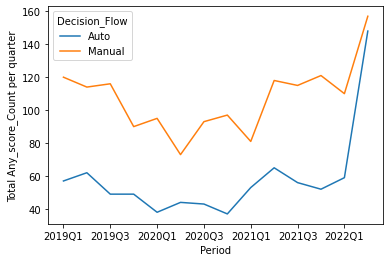

In [14]:
df.pivot_table('Any_score_Count', index='Period', columns='Decision_Flow', aggfunc='sum').plot()
plt.ylabel('Total Any_score_Count per quarter')

In [14]:
dfy = df.loc[df['Score'] == 'Y', ['Revw_Quarter', 'Count','Any_score_Count', 'FinanciCountal_template_Count']]
dfy.columns =  ['Revw_Quarter', 'y_Count','y_Any_score_Count', 'y_FinanciCountal_template_Count']
dfy.head()                

,Revw_Quarter,y_Count,y_Any_score_Count,y_FinanciCountal_template_Count
14,2019/1,61,57,10
15,2019/2,64,62,7
16,2019/3,52,49,5
17,2019/4,50,49,9
18,2020/1,39,38,3


In [15]:
dfn = df.loc[df['Score'] == 'N', ['Revw_Quarter', 'Count','Any_score_Count', 'FinanciCountal_template_Count']]
dfn.columns =  ['Revw_Quarter', 'n_Count','n_Any_score_Count', 'n_FinanciCountal_template_Count']
dfn.head() 

,Revw_Quarter,n_Count,n_Any_score_Count,n_FinanciCountal_template_Count
0,2019/1,153,120,126
1,2019/2,142,114,119
2,2019/3,141,116,119
3,2019/4,117,90,95
4,2020/1,120,95,96


In [20]:
dfz = dfy.merge(dfn, on = 'Revw_Quarter',how = 'inner')
columns =  ['Revw_Quarter', 'y_Count', 'n_Count', 'y_Any_score_Count', 'n_Any_score_Count', 'y_FinanciCountal_template_Count', \
           'n_FinanciCountal_template_Count']
dfz = dfz.reindex(columns = columns)  
dfz.head()

,Revw_Quarter,y_Count,n_Count,y_Any_score_Count,n_Any_score_Count,y_FinanciCountal_template_Count,n_FinanciCountal_template_Count
0,2019/1,61,153,57,120,10,126
1,2019/2,64,142,62,114,7,119
2,2019/3,52,141,49,116,5,119
3,2019/4,50,117,49,90,9,95
4,2020/1,39,120,38,95,3,96


In [24]:
dfy = df.groupby('Revw_Quarter').agg(sum)
dfy.head()

,Count,Any_score_Count,FinanciCountal_template_Count,Any_Score_Pct,Fin_Temp_Pct
Revw_Quarter,,,,,
2019/1,214,177,136,1.718,0.988
2019/2,206,176,126,1.772,0.947
2019/3,193,165,124,1.765,0.940
2019/4,167,139,104,1.749,0.992
2020/1,159,133,99,1.766,0.877


In [25]:
con_file =  path + "Roth_data_score_count.xlsx"
writer = pd.ExcelWriter(con_file)
dfy.to_excel(writer, 'grp')
dfz.to_excel(writer, 'count_w', index = False)
writer.save()